In [1]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

In [2]:
N = 1000

#defining the initial conditions
I0 = 1     
S0 = N - I0

rateOfInfection = 0.375
rateOfRecovery = 1/10

t = np.linspace(0,250,250) # this gives us a timeline of 0 to 200 days with each day being a sample we will plot 


In [3]:
#defining the SIR model differential equations

def sisDifferentialEq(siValues, t, N, b, g):
    S, I = siValues
    
    dSdt = -b*((S*I)/N) + g*I
    dIdt =  b*((S*I)/N) - g*I

    return dSdt , dIdt 


In [4]:
#initializing the sir values vector with initial conditions
v0 = S0, I0

In [5]:
#now using the ode solver to calculate the values of the compartments acc to the timeline we have decided

result = odeint(sisDifferentialEq, v0, t, args=(N, rateOfInfection, rateOfRecovery))

print(result) # the odeint returns an array of values of variables at time = t points defined in the timeline

S, I = result.T

[[999.           1.        ]
 [998.68258577   1.31741423]
 [998.2646585    1.7353415 ]
 [997.71456475   2.28543525]
 [996.99081168   3.00918832]
 [996.0391018    3.9608982 ]
 [994.7885444    5.2114556 ]
 [993.1468637    6.8531363 ]
 [990.99442713   9.00557287]
 [988.17695438  11.82304562]
 [984.4968771   15.5031229 ]
 [979.70355058  20.29644942]
 [973.48294836  26.51705164]
 [965.44819619  34.55180381]
 [955.13342641  44.86657359]
 [941.99498934  58.00501066]
 [925.42592143  74.57407857]
 [904.79117138  95.20882862]
 [879.49124357 120.50875643]
 [849.05858857 150.94141143]
 [813.28221767 186.71778233]
 [772.340851   227.659149  ]
 [726.90737444 273.09262556]
 [678.17732408 321.82267592]
 [627.78422744 372.21577256]
 [577.59993749 422.40006251]
 [529.46574404 470.53425596]
 [484.93262247 515.06737753]
 [445.08447671 554.91552329]
 [410.48002641 589.51997359]
 [381.20188974 618.79811026]
 [356.97126742 643.02873258]
 [337.28180163 662.71819837]
 [321.51910118 678.48089882]
 [309.0499235 

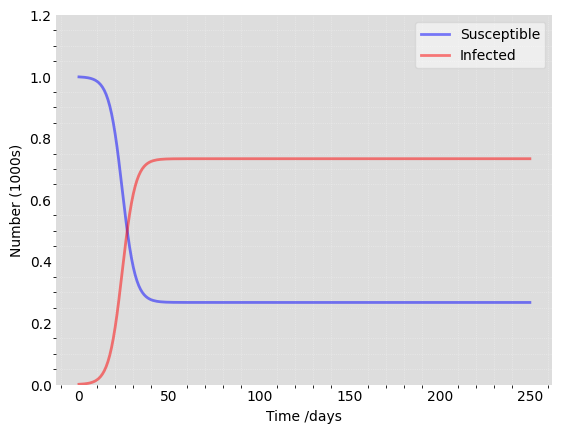

In [6]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')

ax.set_ylim(0,1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

#ax.grid(which='major', color='#DDDDDD', linewidth= 0.5)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
